In [62]:
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y=pd.read_csv('/Users/sudhamshuvidyananda/Documents/Data Mining ALY 6040/Module 4/Reviews.csv')
y

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [82]:
#check the features of the dataset
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [81]:
#checking for null/missing value in the dataset
y.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [83]:
#checking for duplicates

if y.duplicated().any():
    print("There are duplicates")
else:
    print("No duplicates found")

No duplicates found


Rid Of Very Unhelpful Reviews & Narrow It To First 50,000 Due To Data Size

In [64]:
train_set = y.loc[(y['Score'] > 2) & (y['Id'] < 50000)]
train_set

          Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5          6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6          7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
...      ...         ...             ...                              ...   
49994  49995  B00430B73W  A25B2HVKR7K9DZ                           alexis   
49995  49996  B00430B73W   AKW867T7C6HF8                             HWJ3   
49996  49997  B00430B73W  A2PEHNEDMHOYTW                         L. Allen   
49997  49998  B00430B73W  A2QH2KF2IAB143               J. A. Meyers "Jan"   
49998  49999  B00430B73W   AMX286UGXISMA                  Aaron Dragushan   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0

Bring in packages to get rid of Stopwords. This helps get rid of junk words that aren't meaningful

In [65]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sudhamshuvidyananda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sudhamshuvidyananda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Loop to strip out nouns

In [66]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Now use the loop to strip out nouns from the Text column

In [67]:
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))

Add Stop Words to remove words that aren't useful to analysis but common

In [68]:
from sklearn.feature_extraction import text
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


Turn Data Set Into A Matrix To Look Into Reviews (you will see in the last line we are only looking at the Text field)

In [69]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index


In [70]:
# Create the gensim corpus

from gensim import matutils
import scipy.sparse
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())


Get ready to build model

In [71]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan


In [72]:
topics  = ldan.print_topics()
topics

[(0,
  '0.019*"food" + 0.015*"bars" + 0.015*"product" + 0.012*"bar" + 0.009*"snack" + 0.008*"taste" + 0.008*"dog" + 0.008*"butter" + 0.008*"protein" + 0.008*"treats"'),
 (1,
  '0.041*"tea" + 0.023*"flavor" + 0.020*"taste" + 0.020*"coffee" + 0.014*"product" + 0.014*"chocolate" + 0.012*"amazon" + 0.010*"water" + 0.010*"cup" + 0.009*"price"')]

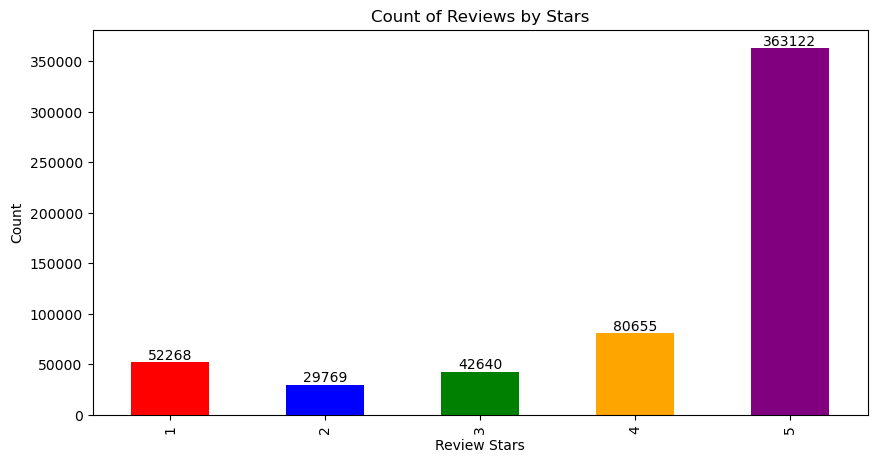

In [73]:
#Exploratory Analysis
# list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
ax = y['Score'].value_counts().sort_index().plot(kind="bar", 
              title="Count of Reviews by Stars", color=colors,
                figsize=(10, 5))
for j in ax.containers:
        ax.bar_label(j)
ax.set_xlabel("Review Stars")
ax.set_ylabel("Count")
plt.show();

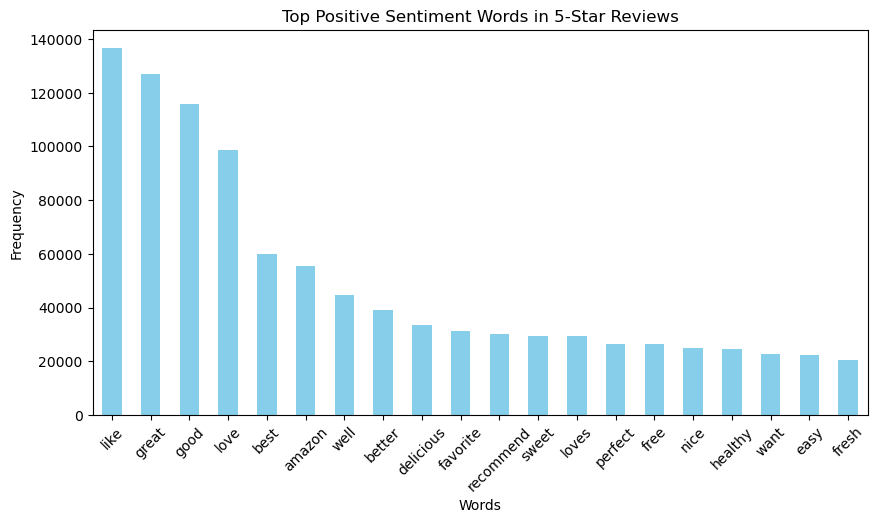

In [84]:
#proving the hypothesis - 5-star reviews will predominantly contain language that expresses satisfaction 
#with the product's quality, value for money, and user experience.

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Filter for 5-star reviews
five_star_reviews = y[y['Score'] == 5]['Text']

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# List of positive sentiment words
positive_words = []

# Tokenize and analyze sentiment of each review
for review in five_star_reviews:
    tokens = word_tokenize(review.lower())  # Tokenize and convert to lower case
    tokens = [word for word in tokens if word.isalpha()]  # Keep words only
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    
    for word in tokens:
        # Get sentiment score
        sentiment_score = sia.polarity_scores(word)
        # If positive sentiment, add to list
        if sentiment_score['compound'] > 0:
            positive_words.append(word)

# Count the frequency of each positive word
positive_word_freq = pd.Series(positive_words).value_counts()

# Take the top 20 most frequent positive words
top_positive_words = positive_word_freq.head(20)

# Plot bar graph
plt.figure(figsize=(10, 5))
top_positive_words.plot(kind='bar', color='skyblue')
plt.title('Top Positive Sentiment Words in 5-Star Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Word Cloud for Topic 0


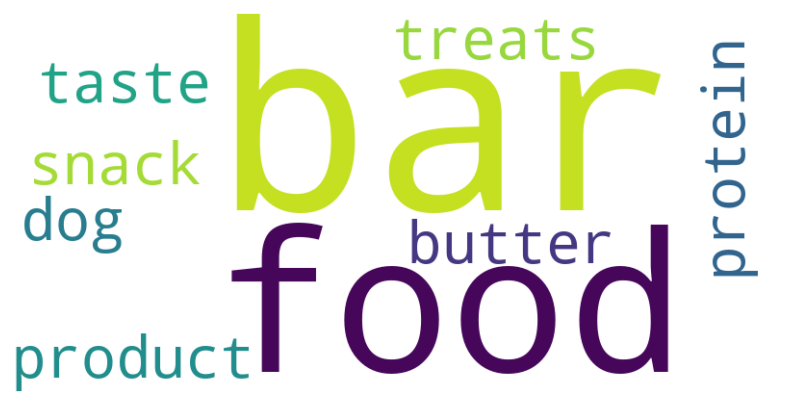

Word Cloud for Topic 1


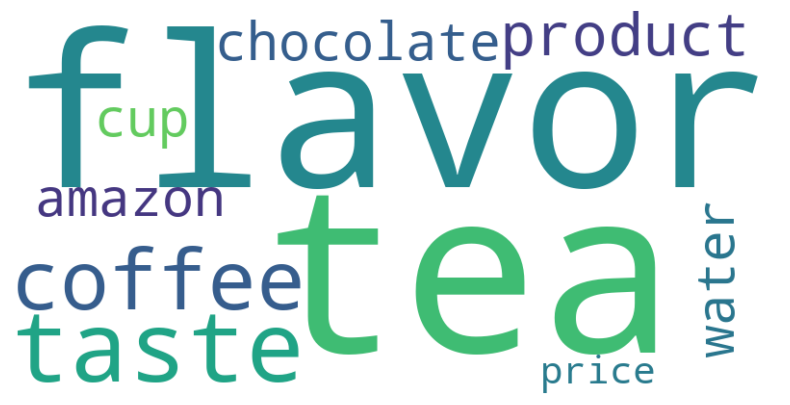

In [74]:
#creating word cloud for each topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud from a topic
def create_wordcloud(topic):
    # Removing the weights and keeping only the words
    words = ' '.join([word.split('*')[1].replace('"', '') for word in topic.split('+')])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for each topic
for topic_number, topic in topics:
    print(f"Word Cloud for Topic {topic_number}")
    create_wordcloud(topic)


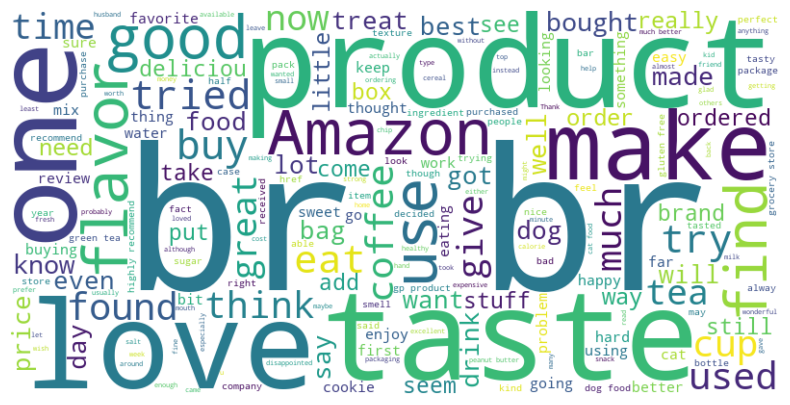

In [80]:
#word cloud for entire dataset
combined_text = ' '.join(y['Text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

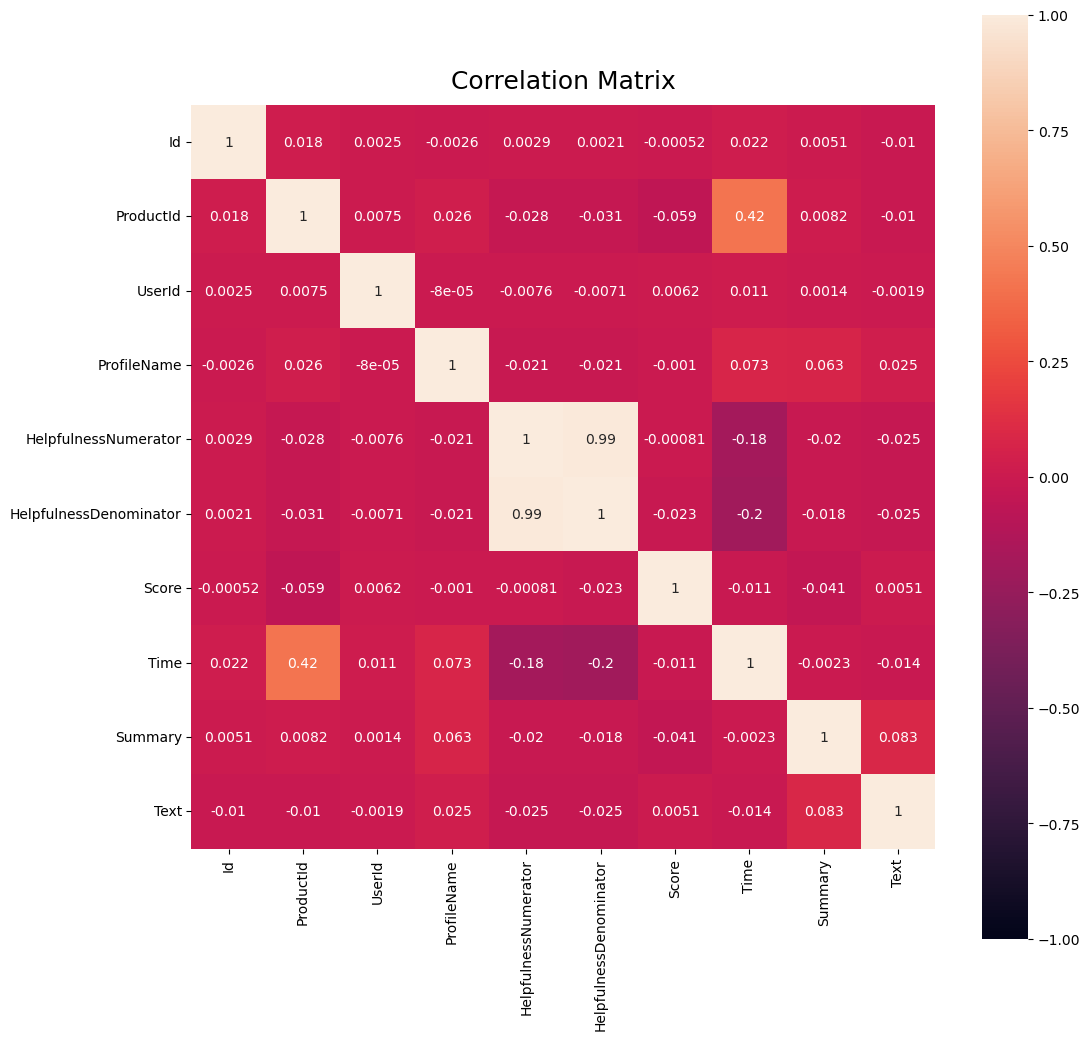

In [78]:
#correlation matrix for all the variables 

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


label1=le.fit_transform(train_set['ProductId'])
train_set.drop('ProductId',axis=1)
train_set['ProductId']=label1

label2=le.fit_transform(train_set['UserId'])
train_set.drop('UserId',axis=1)
train_set['UserId']=label2

label3=le.fit_transform(train_set['ProfileName'])
train_set.drop('ProfileName',axis=1)
train_set['ProfileName']=label3

label4=le.fit_transform(train_set['Summary'])
train_set.drop('Summary',axis=1)
train_set['Summary']=label4

label5=le.fit_transform(train_set['Text'])
train_set.drop('Text',axis=1)
train_set['Text']=label5

word_corr = train_set.corr()
f, ax = plt.subplots(figsize=(12, 12))
corr_map=sns.heatmap(word_corr, square=True, vmin=-1, vmax=1, annot=True);
corr_map.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);